# Import and sandbox

In [1]:
import numpy as np
import pandas as pd
import torch 
from tqdm import tqdm
import matplotlib.pyplot as plt


# check n_wells 

## Imports

In [8]:
df_phenom = pd.read_parquet('/projects/synsight/data/openphenom/raw_well_embeddings/wells_em_openphenom.parquet')

In [2]:
df_dinov2_s = pd.read_parquet('/projects/synsight/data/dinov2_small/raw_well_embeddings/wells_em_dinov2s.parquet')

In [77]:
df_dinov2_g = pd.read_parquet('/projects/synsight/data/dinov2/raw_well_embeddings/wells_em_dinov2.parquet')

In [11]:
df_resnet = pd.read_parquet('/projects/cpjump1/jump/images_embeddings/resnet50_raw/metadata/load_wells/df_meta_raw_well.parquet')

In [12]:
df_chada = pd.read_parquet('/projects/synsight/data/chada/well_embeddings/metadata_raw_mean.parquet')

In [13]:
df_chada_2 = pd.read_parquet('/projects/synsight/data/chada/chada_jump.parquet')

In [14]:
df_meta = pd.read_csv('/projects/cpjump1/jump/metadata/complete_metadata.csv')

/tmp/ipykernel_3523065/3787900309.py:1: DtypeWarning: Columns (2,8,9,10,11,12,13,14,15,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv('/projects/cpjump1/jump/metadata/complete_metadata.csv')


## Reference

In [15]:
images_df_path = "/projects/cpjump1/jump/load_data/final"
images_df = pd.read_parquet(images_df_path)

images_df["Metadata_Batch"] = images_df["Metadata_Batch"].astype(str)
df_meta["Metadata_Batch"] = df_meta["Metadata_Batch"].astype(str)
images_df["Metadata_Plate"] = images_df["Metadata_Plate"].astype(str)
df_meta["Metadata_Plate"] = df_meta["Metadata_Plate"].astype(str)
images_df["Metadata_Source"] = images_df["Metadata_Source"].astype(str)
df_meta["Metadata_Source"] = df_meta["Metadata_Source"].astype(str)
images_df["Metadata_Well"] = images_df["Metadata_Well"].astype(str)
df_meta["Metadata_Well"] = df_meta["Metadata_Well"].astype(str)

merged_df = pd.merge(images_df, df_meta, on=["Metadata_Source", "Metadata_Plate", "Metadata_Well"])
merged_df

,Metadata_Source,Metadata_Batch_x,Metadata_Plate,Metadata_Well,Metadata_Site,FileName_OrigAGP,FileName_OrigDNA,FileName_OrigER,FileName_OrigMito,FileName_OrigRNA,...,Metadata_Symbol_y,Metadata_Microscope_Name,Metadata_Widefield_vs_Confocal,Metadata_Excitation_Type,Metadata_Objective_NA,Metadata_N_Brightfield_Planes_Min,Metadata_N_Brightfield_Planes_Max,Metadata_Distance_Between_Z_Microns,Metadata_Sites_Per_Well,Metadata_Filter_Configuration
0,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A01,1,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,...,NaN,CV8000,Confocal,Laser,0.75,3,3,5.0,6,A
1,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A01,3,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,...,NaN,CV8000,Confocal,Laser,0.75,3,3,5.0,6,A
2,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A01,6,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,...,NaN,CV8000,Confocal,Laser,0.75,3,3,5.0,6,A
3,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A02,1,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,...,NaN,CV8000,Confocal,Laser,0.75,3,3,5.0,6,A
4,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A02,2,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,/projects/cpjump3/jump/images/source_10/2021_0...,...,NaN,CV8000,Confocal,Laser,0.75,3,3,5.0,6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121195,source_9,20211103-Run16,GR00004421,Z47,3,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,...,NaN,Opera Phenix,Widefield,Laser,0.80,0,0,NaN,4,H
5121196,source_9,20211103-Run16,GR00004421,Z47,4,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,...,NaN,Opera Phenix,Widefield,Laser,0.80,0,0,NaN,4,H
5121197,source_9,20211103-Run16,GR00004421,Z48,1,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,...,NaN,Opera Phenix,Widefield,Laser,0.80,0,0,NaN,4,H
5121198,source_9,20211103-Run16,GR00004421,Z48,2,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,/projects/cpjump1/jump/images/source_9/2021110...,...,NaN,Opera Phenix,Widefield,Laser,0.80,0,0,NaN,4,H


In [10]:
len(merged_df)

5121200

In [11]:
merged_df[(merged_df['Metadata_PlateType']=='COMPOUND')]["Metadata_JCP2022"].nunique()

112482

In [62]:
df_meta[(df_meta['Metadata_PlateType']=='COMPOUND')]["Metadata_JCP2022"].nunique()

115733

In [68]:
key_columns = ['Metadata_Source', 'Metadata_Plate', 'Metadata_Well']

df1 = merged_df[merged_df['Metadata_PlateType']=='COMPOUND'][['Metadata_Source', 'Metadata_Well', 'Metadata_Plate', 'Metadata_JCP2022']]
df2 = df_meta[(df_meta['Metadata_PlateType']=='COMPOUND')]
only_in_df1 = df1.merge(df2, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
only_in_df2 = df2.merge(df1, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

In [80]:
only_in_df2[only_in_df2['Metadata_Source']!='source_7']['Metadata_Plate'].unique()

array(['Dest210803-160702', 'EC000157'], dtype=object)

In [95]:
key_columns = ['Metadata_Source', 'Metadata_Plate', 'Metadata_Well']

df1 = merged_df[merged_df['Metadata_PlateType']!='COMPOUND'][['Metadata_Source', 'Metadata_Well', 'Metadata_Plate', 'Metadata_JCP2022']]
df2 = df_meta[(df_meta['Metadata_PlateType'].isin(['TARGET2', 'CRISPR', 'ORF', 'TARGET1']))]
only_in_df1 = df1.merge(df2, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
only_in_df2 = df2.merge(df1, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

In [99]:
only_in_df2['Metadata_Source'].value_counts()

Metadata_Source
source_4    9442
source_7    2688
Name: count, dtype: int64

In [16]:
df = merged_df[merged_df["Metadata_PlateType"]=='COMPOUND'][['Metadata_Source', 'Metadata_Batch_x', 'Metadata_Plate',
       'Metadata_Well', 'Metadata_JCP2022', 'Metadata_InChI']]
df.columns = ['Metadata_Source', 'Metadata_Batch', 'Metadata_Plate', 'Metadata_Well', 'Metadata_JCP2022', 'Metadata_InChI']

In [17]:
ref_compound_df = df[~df['Metadata_JCP2022'].isin(['JCP2022_999999', 'JCP2022_UNKNOWN'])].drop_duplicates()[~df['Metadata_JCP2022'].isin(['JCP2022_999999', 'JCP2022_UNKNOWN'])].reset_index().drop(columns='index')

/tmp/ipykernel_3523065/1714066172.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ref_compound_df = df[~df['Metadata_JCP2022'].isin(['JCP2022_999999', 'JCP2022_UNKNOWN'])].drop_duplicates()[~df['Metadata_JCP2022'].isin(['JCP2022_999999', 'JCP2022_UNKNOWN'])].reset_index().drop(columns='index')


In [18]:
ref_compound_df

,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_Well,Metadata_JCP2022,Metadata_InChI
0,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A01,JCP2022_085227,InChI=1S/C17H30N2O5/c1-6-23-17(22)14-13(24-14)...
1,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A02,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3
2,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A03,JCP2022_056163,InChI=1S/C21H20ClN3O4/c1-27-18-8-7-15(9-19(18)...
3,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A04,JCP2022_054175,InChI=1S/C21H29N3O3/c1-27-16-7-5-14(6-8-16)17-...
4,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A06,JCP2022_008983,InChI=1S/C21H17ClFN3O3/c1-25-19(27)17-16(15-13...
...,...,...,...,...,...,...
746870,source_9,20211103-Run16,GR00004421,Z24,JCP2022_037716,InChI=1S/C28H21N7OS/c1-17-15-24(37-16-17)25-20...
746871,source_9,20211103-Run16,GR00004421,Z25,JCP2022_037716,InChI=1S/C28H21N7OS/c1-17-15-24(37-16-17)25-20...
746872,source_9,20211103-Run16,GR00004421,Z26,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3
746873,source_9,20211103-Run16,GR00004421,Z47,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3


In [25]:
ref_compound_df['Metadata_JCP2022'].value_counts()[:10]

Metadata_JCP2022
JCP2022_033924    81340
JCP2022_037716     7666
JCP2022_064022     7663
JCP2022_025848     7660
JCP2022_046054     7654
JCP2022_050797     7649
JCP2022_012818     7643
JCP2022_085227     7238
JCP2022_035095     6078
JCP2022_033954     1589
Name: count, dtype: int64

In [19]:
count = ref_compound_df['Metadata_JCP2022'].value_counts().values

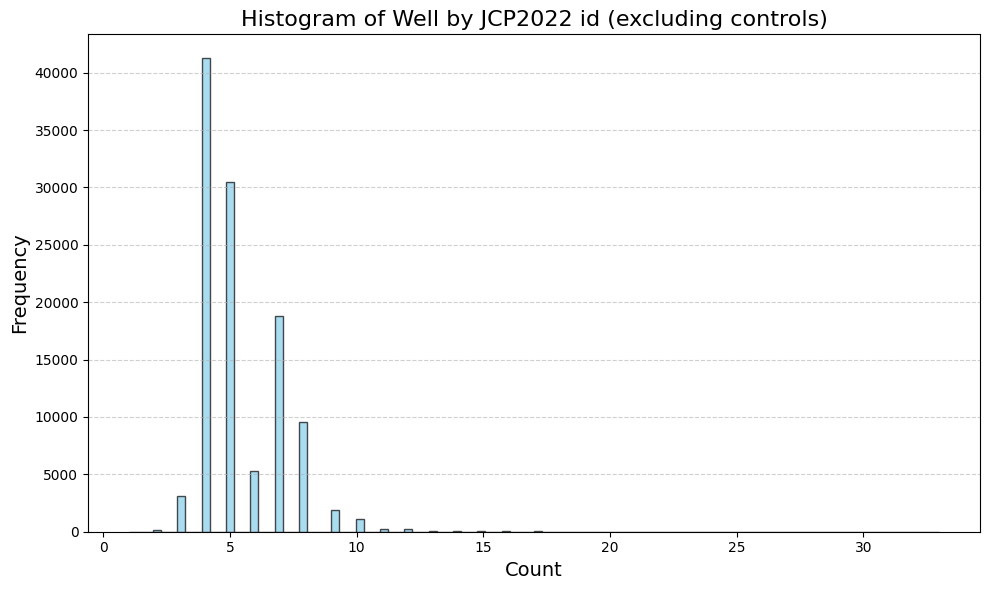

In [37]:
plt.figure(figsize=(10, 6))  # Set figure size
plt.hist(count[10:], bins=100, log=False, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Histogram of Well by JCP2022 id (excluding controls)', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


## Counts

### Resnet

In [121]:
len(ref_compound_df)

785137

In [122]:
len(df_resnet)

746875

In [16]:

df2 = df_resnet.copy(deep=True)

key_columns = ['Metadata_Source', 'Metadata_Plate', 'Metadata_Well']

only_in_ref = ref_compound_df.merge(df2, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
only_in_df2 = df2.merge(ref_compound_df, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)



In [154]:
print(len(only_in_df2))
print(len(only_in_ref))

0
0


### chada

In [155]:
len(df_chada)

746870

In [158]:

df2 = df_chada.copy(deep=True)

key_columns = ['Metadata_Source', 'Metadata_Plate', 'Metadata_Well']

only_in_ref = ref_compound_df.merge(df2, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
only_in_df2 = df2.merge(ref_compound_df, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

print(len(only_in_df2))
print(len(only_in_ref))

0
5


In [159]:
only_in_ref # One molecule that is strange in formula so should have failed while preprocessed by @ThomasLemercier

,Metadata_Source,Metadata_Batch_x,Metadata_Plate,Metadata_Well,Metadata_JCP2022_x,Metadata_InChI,Metadata_PlateType,Metadata_Batch_y,Metadata_Is_Control,Embeddings_mean,Metadata_Row,Metadata_Col,Path_Embeddings,Metadata_JCP2022_y
273751,source_2,20210823_Batch_10,1086291931,A08,JCP2022_065740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295607,source_3,CP59,BR5871b3,A15,JCP2022_065740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367421,source_3,CP_35_all_Phenix1,BAY5871b,A15,JCP2022_065740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501659,source_6,p211012CPU2OS48hw384exp033JUMP,110000295620,A15,JCP2022_065740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579163,source_8,J3,A1170530,A15,JCP2022_065740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### dino (s and g have the exact same lines)

#### dino s

In [17]:
len(df_dinov2_s.drop_duplicates(subset=key_columns))

992234

In [53]:
duplicates = df_dinov2_s.groupby(key_columns).filter(lambda x: len(x) > 1)


,Metadata_Well,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_JCP2022,Metadata_InChI,Metadata_Is_Control,Metadata_Row,Metadata_Col,path_embedding


In [47]:
embeddings = []
for path in duplicates['path_embedding']:
    embeddings.append(torch.load(path))
    

/tmp/ipykernel_3523065/2148999068.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings.append(torch.load(path))


In [51]:
(embeddings[3] == embeddings[5]).all()

tensor(True)

In [52]:
df_dinov2_s.drop(index=[186948, 734868, 811287], inplace=True)


In [60]:
df2 = df_dinov2_s.copy(deep=True)
key_columns = ['Metadata_Source', 'Metadata_Plate', 'Metadata_Well']
only_in_ref = ref_compound_df.merge(df2, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
only_in_df2 = df2.merge(ref_compound_df, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

print(len(only_in_df2))
print(len(only_in_ref))

245359
0


In [65]:
df_dinov2_s.columns

Index(['Metadata_Well', 'Metadata_Source', 'Metadata_Batch', 'Metadata_Plate',
       'Metadata_JCP2022', 'Metadata_InChI', 'Metadata_Is_Control',
       'Metadata_Row', 'Metadata_Col', 'path_embedding'],
      dtype='object')

In [66]:
df_dinov2_s_good = ref_compound_df.merge(df_dinov2_s[['Metadata_Well', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Is_Control','Metadata_Row', 'Metadata_Col', 'path_embedding']], on=key_columns, how='inner')
df_dinov2_s_good.reset_index(drop=True, inplace=True)

In [68]:
df_dinov2_s_good

,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_Well,Metadata_JCP2022,Metadata_InChI,Metadata_Is_Control,Metadata_Row,Metadata_Col,path_embedding
0,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A01,JCP2022_085227,InChI=1S/C17H30N2O5/c1-6-23-17(22)14-13(24-14)...,False,1,1,/projects/synsight/data/dinov2_small/raw_well_...
1,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A02,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,True,1,2,/projects/synsight/data/dinov2_small/raw_well_...
2,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A03,JCP2022_056163,InChI=1S/C21H20ClN3O4/c1-27-18-8-7-15(9-19(18)...,False,1,3,/projects/synsight/data/dinov2_small/raw_well_...
3,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A04,JCP2022_054175,InChI=1S/C21H29N3O3/c1-27-16-7-5-14(6-8-16)17-...,False,1,4,/projects/synsight/data/dinov2_small/raw_well_...
4,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A06,JCP2022_008983,InChI=1S/C21H17ClFN3O3/c1-25-19(27)17-16(15-13...,False,1,6,/projects/synsight/data/dinov2_small/raw_well_...
...,...,...,...,...,...,...,...,...,...,...
746870,source_9,20211103-Run16,GR00004421,Z24,JCP2022_037716,InChI=1S/C28H21N7OS/c1-17-15-24(37-16-17)25-20...,False,26,24,/projects/synsight/data/dinov2_small/raw_well_...
746871,source_9,20211103-Run16,GR00004421,Z25,JCP2022_037716,InChI=1S/C28H21N7OS/c1-17-15-24(37-16-17)25-20...,False,26,25,/projects/synsight/data/dinov2_small/raw_well_...
746872,source_9,20211103-Run16,GR00004421,Z26,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,True,26,26,/projects/synsight/data/dinov2_small/raw_well_...
746873,source_9,20211103-Run16,GR00004421,Z47,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,True,26,47,/projects/synsight/data/dinov2_small/raw_well_...


In [69]:
df_dinov2_s_good.to_parquet('/projects/synsight/data/dinov2_small/raw_well_embeddings/compounds_wells_em_dinov2s.parquet', index=False)

In [3]:
df_dinov2_s_good = pd.read_parquet('/projects/synsight/data/dinov2_small/raw_well_embeddings/compounds_wells_em_dinov2s.parquet')

In [4]:
df_dinov2_s_good

,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_Well,Metadata_JCP2022,Metadata_InChI,Metadata_Is_Control,Metadata_Row,Metadata_Col,path_embedding
0,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A01,JCP2022_085227,InChI=1S/C17H30N2O5/c1-6-23-17(22)14-13(24-14)...,False,1,1,/projects/synsight/data/dinov2_small/raw_well_...
1,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A02,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,True,1,2,/projects/synsight/data/dinov2_small/raw_well_...
2,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A03,JCP2022_056163,InChI=1S/C21H20ClN3O4/c1-27-18-8-7-15(9-19(18)...,False,1,3,/projects/synsight/data/dinov2_small/raw_well_...
3,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A04,JCP2022_054175,InChI=1S/C21H29N3O3/c1-27-16-7-5-14(6-8-16)17-...,False,1,4,/projects/synsight/data/dinov2_small/raw_well_...
4,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A06,JCP2022_008983,InChI=1S/C21H17ClFN3O3/c1-25-19(27)17-16(15-13...,False,1,6,/projects/synsight/data/dinov2_small/raw_well_...
...,...,...,...,...,...,...,...,...,...,...
746870,source_9,20211103-Run16,GR00004421,Z24,JCP2022_037716,InChI=1S/C28H21N7OS/c1-17-15-24(37-16-17)25-20...,False,26,24,/projects/synsight/data/dinov2_small/raw_well_...
746871,source_9,20211103-Run16,GR00004421,Z25,JCP2022_037716,InChI=1S/C28H21N7OS/c1-17-15-24(37-16-17)25-20...,False,26,25,/projects/synsight/data/dinov2_small/raw_well_...
746872,source_9,20211103-Run16,GR00004421,Z26,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,True,26,26,/projects/synsight/data/dinov2_small/raw_well_...
746873,source_9,20211103-Run16,GR00004421,Z47,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,True,26,47,/projects/synsight/data/dinov2_small/raw_well_...


#### dino g

In [80]:
duplicates = df_dinov2_g.groupby(key_columns).filter(lambda x: len(x) > 1)
duplicates

,Metadata_Well,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_JCP2022,Metadata_InChI,Metadata_Is_Control,Metadata_Row,Metadata_Col,path_embedding


In [79]:
df_dinov2_g.drop(index=[25526, 167155, 444675], inplace=True)

In [81]:
df_dinov2_g_good = ref_compound_df.merge(df_dinov2_g[['Metadata_Well', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Is_Control','Metadata_Row', 'Metadata_Col', 'path_embedding']], on=key_columns, how='inner')
df_dinov2_g_good.reset_index(drop=True, inplace=True)

In [88]:
df_dinov2_g_good['Metadata_InChI']

0         InChI=1S/C17H30N2O5/c1-6-23-17(22)14-13(24-14)...
1                           InChI=1S/C2H6OS/c1-4(2)3/h1-2H3
2         InChI=1S/C21H20ClN3O4/c1-27-18-8-7-15(9-19(18)...
3         InChI=1S/C21H29N3O3/c1-27-16-7-5-14(6-8-16)17-...
4         InChI=1S/C21H17ClFN3O3/c1-25-19(27)17-16(15-13...
                                ...                        
746870    InChI=1S/C28H21N7OS/c1-17-15-24(37-16-17)25-20...
746871    InChI=1S/C28H21N7OS/c1-17-15-24(37-16-17)25-20...
746872                      InChI=1S/C2H6OS/c1-4(2)3/h1-2H3
746873                      InChI=1S/C2H6OS/c1-4(2)3/h1-2H3
746874    InChI=1S/C28H21N7OS/c1-17-15-24(37-16-17)25-20...
Name: Metadata_InChI, Length: 746875, dtype: object

In [93]:
df_dinov2_g_good[df_dinov2_g_good['Metadata_JCP2022']=='JCP2022_002781']['Metadata_InChI'].iloc[0]

'InChI=1S/C16H12N3O.3C4H9.Sn/c20-16-12-7-4-8-13-14(12)19(10-9-17-16)15(18-13)11-5-2-1-3-6-11;3*1-3-4-2;/h2-8H,9-10H2,(H,17,20);3*1,3-4H2,2H3;'

In [94]:
df_dinov2_g_good['Metadata_JCP2022'].value_counts()

Metadata_JCP2022
JCP2022_033924    81340
JCP2022_037716     7666
JCP2022_064022     7663
JCP2022_025848     7660
JCP2022_046054     7654
                  ...  
JCP2022_032604        2
JCP2022_055000        2
JCP2022_115611        2
JCP2022_080384        1
JCP2022_090832        1
Name: count, Length: 112480, dtype: int64

In [83]:
df_dinov2_g_good.to_parquet('/projects/synsight/data/dinov2/raw_well_embeddings/compounds_wells_em_dinov2g.parquet', index=False)

### OpenPhenom

In [162]:
len(df_phenom)

992234

In [163]:

df2 = df_phenom.copy(deep=True)

key_columns = ['Metadata_Source', 'Metadata_Plate', 'Metadata_Well']

only_in_ref = ref_compound_df.merge(df2, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
only_in_df2 = df2.merge(ref_compound_df, on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

print(len(only_in_df2))
print(len(only_in_ref))

245359
0


In [84]:
df_phenom_good = ref_compound_df.merge(df_phenom[['Metadata_Well', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Is_Control','Metadata_Row', 'Metadata_Col', 'path_embedding']], on=key_columns, how='inner')
df_phenom_good.reset_index(drop=True, inplace=True)

In [85]:
df_phenom_good

,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_Well,Metadata_JCP2022,Metadata_InChI,Metadata_Is_Control,Metadata_Row,Metadata_Col,path_embedding
0,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A01,JCP2022_085227,InChI=1S/C17H30N2O5/c1-6-23-17(22)14-13(24-14)...,False,1,1,/projects/synsight/data/openphenom/raw_well_em...
1,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A02,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,True,1,2,/projects/synsight/data/openphenom/raw_well_em...
2,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A03,JCP2022_056163,InChI=1S/C21H20ClN3O4/c1-27-18-8-7-15(9-19(18)...,False,1,3,/projects/synsight/data/openphenom/raw_well_em...
3,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A04,JCP2022_054175,InChI=1S/C21H29N3O3/c1-27-16-7-5-14(6-8-16)17-...,False,1,4,/projects/synsight/data/openphenom/raw_well_em...
4,source_10,2021_05_31_U2OS_48_hr_run1,Dest210531-152149,A06,JCP2022_008983,InChI=1S/C21H17ClFN3O3/c1-25-19(27)17-16(15-13...,False,1,6,/projects/synsight/data/openphenom/raw_well_em...
...,...,...,...,...,...,...,...,...,...,...
746870,source_9,20211103-Run16,GR00004421,Z24,JCP2022_037716,InChI=1S/C28H21N7OS/c1-17-15-24(37-16-17)25-20...,False,26,24,/projects/synsight/data/openphenom/raw_well_em...
746871,source_9,20211103-Run16,GR00004421,Z25,JCP2022_037716,InChI=1S/C28H21N7OS/c1-17-15-24(37-16-17)25-20...,False,26,25,/projects/synsight/data/openphenom/raw_well_em...
746872,source_9,20211103-Run16,GR00004421,Z26,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,True,26,26,/projects/synsight/data/openphenom/raw_well_em...
746873,source_9,20211103-Run16,GR00004421,Z47,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,True,26,47,/projects/synsight/data/openphenom/raw_well_em...


In [86]:
df_phenom_good.to_parquet('/projects/synsight/data/openphenom/raw_well_embeddings/compounds_wells_em_openphenom.parquet', index=False)

In [ ]:
df_phenom = pd.read_parquet('/projects/synsight/data/openphenom/raw_well_embeddings/wells_em_openphenom.parquet')